<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610_HW3/blob/master/CP5610_HW3_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import VGG16
from keras import backend as K
from keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, utils

# Import VGG model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


# Fine tuning with data augmentation

In [2]:
# Download cats and dogs data set
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-18 13:21:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   120MB/s    in 0.5s    

2019-04-18 13:21:48 (120 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Process data set
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras import models
from keras import layers

# Add Dense layers on top of model
model = models.Sequential()

vgg.trainable = False

model.add(vgg)

# Flatten output of VGG
model.add(layers.Flatten())

# FC layers and final classification layer
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [5]:
from keras.preprocessing.image import ImageDataGenerator

#Create data augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


# Compile model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Train model - just the last fc layers
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 23s 235ms/step - loss: 0.5563 - acc: 0.7075 - val_loss: 0.3443 - val_acc: 0.8440
Epoch 2/20
100/100 [==============================] - 18s 181ms/step - loss: 0.4165 - acc: 0.8085 - val_loss: 0.3246 - val_acc: 0.8540
Epoch 3/20
100/100 [==============================] - 18s 178ms/step - loss: 0.3923 - acc: 0.8205 - val_loss: 0.2732 - val_acc: 0.8740
Epoch 4/20
100/100 [==============================] - 19s 186ms/step - loss: 0.3750 - acc: 0.8310 - val_loss: 0.2738 - val_acc: 0.8870
Epoch 5/20
100/100 [==============================] - 18s 179ms/step - loss: 0.3540 - acc: 0.8390 - val_loss: 0.2922 - val_acc: 0.8720
Epoch 6/20
100/100 [==============================] - 18s 179ms/step - loss: 0.3572 - acc: 0.8415 - val_loss: 0.3020 - val_acc: 0.8830
Epoch 7/20
100/100 [==============================] - 18s 183ms/step - loss: 0.3520 - acc: 0.8435 - val_loss: 0.2794 - val_acc: 0.8810
Epoch 8

In [9]:
from tensorflow import keras
from keras import optimizers
# enable fine tuning for last conv layer
vgg.trainable = True

for layer in vgg.layers:
  if layer.name == 'block5_conv3':
    layer.trainable = True
  else:
    layer.trainable = False

    
for layer in vgg.layers:
  print(layer.name, layer.trainable)
  
  
opt = optimizers.RMSprop(lr=0.00001)

# Compile model
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 True
block5_pool False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
________________________________________________________

In [10]:
# Train model with fine tuning
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 21s 208ms/step - loss: 0.2603 - acc: 0.8825 - val_loss: 0.2634 - val_acc: 0.8950
Epoch 2/20
100/100 [==============================] - 18s 180ms/step - loss: 0.2567 - acc: 0.8885 - val_loss: 0.2450 - val_acc: 0.9060
Epoch 3/20
100/100 [==============================] - 18s 180ms/step - loss: 0.2578 - acc: 0.8925 - val_loss: 0.2580 - val_acc: 0.9000
Epoch 4/20
100/100 [==============================] - 19s 187ms/step - loss: 0.2514 - acc: 0.9000 - val_loss: 0.2600 - val_acc: 0.8980
Epoch 5/20
100/100 [==============================] - 18s 179ms/step - loss: 0.2180 - acc: 0.9075 - val_loss: 0.2909 - val_acc: 0.8970
Epoch 6/20
100/100 [==============================] - 18s 178ms/step - loss: 0.2531 - acc: 0.8935 - val_loss: 0.2506 - val_acc: 0.9080
Epoch 7/20
100/100 [==============================] - 18s 179ms/step - loss: 0.2217 - acc: 0.9110 - val_loss: 0.2506 - val_acc: 0.9110
Epoch 8/20
100/100 [==============================] - 1

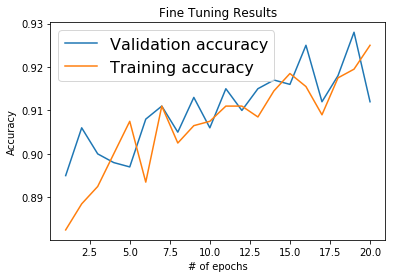

In [12]:
#plot results
import matplotlib as mpl
import matplotlib.pyplot as plt

epoch = []
for i in range(20):
  epoch.append(i+1)
  
plt.plot(epoch, history.history['val_acc'], label='Validation accuracy')
plt.plot(epoch, history.history['acc'], label='Training accuracy')
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Fine Tuning Results")
plt.legend(loc="upper left", fontsize=16)
plt.show()

In [13]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()

# download to google drive                       
drive.CreateFile({'id': model_file.get('id')})



    100% |████████████████████████████████| 993kB 23.1MB/s 


GoogleDriveFile({'id': '1Fdq4nr38hqcn2UocSAPN4FfBCAlOGYFu'})